# Undirected scale-free networks

## Dependencies

In [1]:
%load_ext autoreload
%autoreload 2

from netin import PA
from netin import PAH
from netin import PATC
from netin import PATCH
from netin import viz
from netin import stats

## Network parameters

In [2]:
n = 1000
k = 2
f_m = 0.1
h_MM = 0.9
h_mm = 0.9
tc = 0.8
seed = 1234

## Generation

In [3]:
# PA: Preferential attachment only
g_pa = PA(n=n, k=k, f_m=f_m, seed=seed)
g_pa.generate()
g_pa.info()

=== Params ===
n: 1000
f_m: 0.1
k: 2
seed: 1234
=== Model ===
Model: PA
Class attribute: m
Class values: [0, 1]
Class labels: ['M', 'm']
Generation time: 1.2394919395446777 (secs)
=== Computed ===
- is directed: False
- number of nodes: 1000
- number of edges: 1996
- minimum degree: 2
- fraction of minority: 0.1
- edge-type counts: Counter({'MM': 1655, 'Mm': 180, 'mM': 141, 'mm': 20})
- density: 0.003995995995995996
- diameter: 8
- average shortest path length: 4.154758758758759
- average degree: 3.992
- degree assortativity: -0.07205891167684375
- attribute assortativity (m): 0.022397926137728272
- transitivity: 0.00993320774105155
- average clustering: 0.022453234341499925
- Powerlaw fit (degree):
- M: alpha=2.4632290234505, sigma=0.04877430078168333, min=2.0, max=70.0
- m: alpha=2.370442923631841, sigma=0.1370442923631841, min=2.0, max=17.0


In [4]:
# PAH: Preferential attachment and homophily
g_pah = PAH(n=n, k=k, f_m=f_m, h_MM=h_MM, h_mm=h_mm, seed=seed)
g_pah.generate()
g_pah.info()

=== Params ===
n: 1000
f_m: 0.1
k: 2
h_MM: 0.9
h_mm: 0.9
mixing matrix: 
[[0.9 0.1]
 [0.1 0.9]]
seed: 1234
=== Model ===
Model: PAH
Class attribute: m
Class values: [0, 1]
Class labels: ['M', 'm']
Generation time: 1.5296344757080078 (secs)
=== Computed ===
- is directed: False
- number of nodes: 1000
- number of edges: 1996
- minimum degree: 2
- fraction of minority: 0.1
- edge-type counts: Counter({'MM': 1784, 'Mm': 133, 'mm': 67, 'mM': 12})
- density: 0.003995995995995996
- diameter: 7
- average shortest path length: 4.094460460460461
- average degree: 3.992
- degree assortativity: -0.1204271602746538
- attribute assortativity (m): 0.4412347588198785
- transitivity: 0.009613869188337273
- average clustering: 0.0272429544386381
- Powerlaw fit (degree):
- M: alpha=2.448054811177988, sigma=0.048268493705932926, min=2.0, max=57.0
- m: alpha=2.773132036430505, sigma=0.17731320364305053, min=2.0, max=8.0
- Empirical homophily within majority: 0.942201243701727
- Empirical homophily within 

In [5]:
# PATC: Preferential attachment and triadic closure
g_patc = PATC(n=n, k=k, f_m=f_m, tc=tc, seed=seed)
g_patc.generate()
g_patc.info()

=== Params ===
n: 1000
f_m: 0.1
k: 2
tc: 0.8
seed: 1234
=== Model ===
Model: PATC
Class attribute: m
Class values: [0, 1]
Class labels: ['M', 'm']
Generation time: 0.9199769496917725 (secs)
=== Computed ===
- is directed: False
- number of nodes: 1000
- number of edges: 1996
- minimum degree: 2
- fraction of minority: 0.1
- edge-type counts: Counter({'MM': 1623, 'Mm': 183, 'mM': 173, 'mm': 17})
- density: 0.003995995995995996
- diameter: 10
- average shortest path length: 4.642116116116116
- average degree: 3.992
- degree assortativity: -0.10705617464659427
- attribute assortativity (m): -0.011654493942112114
- transitivity: 0.1287202778519904
- average clustering: 0.6004463626617123
- Powerlaw fit (degree):
- M: alpha=2.4866160646835347, sigma=0.04955386882278449, min=2.0, max=66.0
- m: alpha=2.4619050292765965, sigma=0.14619050292765964, min=2.0, max=36.0


In [6]:
# PATCH: Preferential attachment, homophily, and triadic closure
g_patch = PATCH(n=n, k=k, f_m=f_m, h_MM=h_MM, h_mm=h_mm, tc=tc, seed=seed)
g_patch.generate()
g_patch.info()

=== Params ===
n: 1000
f_m: 0.1
k: 2
h_MM: 0.9
h_mm: 0.9
mixing matrix: 
[[0.9 0.1]
 [0.1 0.9]]
tc: 0.8
seed: 1234
=== Model ===
Model: PATCH
Class attribute: m
Class values: [0, 1]
Class labels: ['M', 'm']
Generation time: 1.1559553146362305 (secs)
=== Computed ===
- is directed: False
- number of nodes: 1000
- number of edges: 1996
- minimum degree: 2
- fraction of minority: 0.1
- edge-type counts: Counter({'MM': 1744, 'Mm': 155, 'mM': 52, 'mm': 45})
- density: 0.003995995995995996
- diameter: 10
- average shortest path length: 4.708366366366366
- average degree: 3.992
- degree assortativity: -0.11255381227880877
- attribute assortativity (m): 0.2470086521507371
- transitivity: 0.13287678798254818
- average clustering: 0.5922042497216702
- Powerlaw fit (degree):
- M: alpha=2.4386941476748207, sigma=0.04795647158916069, min=2.0, max=61.0
- m: alpha=2.798272325759389, sigma=0.1798272325759389, min=2.0, max=11.0
- Empirical homophily within majority: None
- Empirical homophily within mi

## Plots

In [7]:
viz.reset_style()
viz.set_paper_style()

### Graph

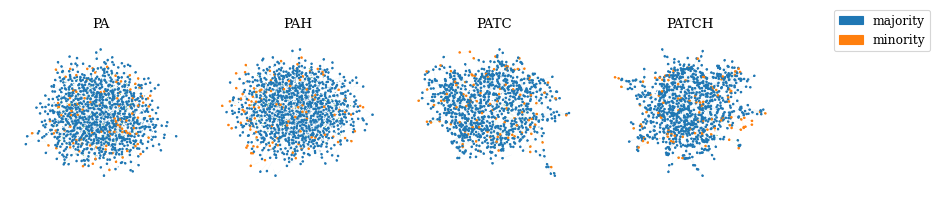

In [8]:
graphs = [g_pa, g_pah, g_patc, g_patch]
viz.plot_graph(graphs, cell_size=2, share_pos=False)

### Node attributes

In [9]:
md_pa = g_pa.get_node_metadata_as_dataframe(n_jobs=10)
md_pah = g_pah.get_node_metadata_as_dataframe(n_jobs=10)
md_patc = g_patc.get_node_metadata_as_dataframe(n_jobs=10)
md_patch = g_patch.get_node_metadata_as_dataframe(n_jobs=10)


QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

In [10]:
# see example of genereate metadata 
md_pa.head()

,node,class_label,degree,in_degree,out_degree,clustering,betweenness,closeness,eigenvector,pagerank,degree_rank,in_degree_rank,out_degree_rank,clustering_rank,betweenness_rank,closeness_rank,eigenvector_rank,pagerank_rank
0,0,M,50,NaN,NaN,0.012245,0.147902,0.359870,0.240071,0.010447,0.066667,NaN,NaN,0.555556,0.002041,0.002736,0.002,0.002012
1,1,M,10,NaN,NaN,0.066667,0.010750,0.296000,0.080638,0.002257,0.733333,NaN,NaN,0.166667,0.054082,0.036936,0.017,0.056338
2,2,M,27,NaN,NaN,0.008547,0.053655,0.331014,0.124816,0.005822,0.300000,NaN,NaN,0.750000,0.010204,0.010944,0.009,0.009054
3,3,M,70,NaN,NaN,0.009938,0.221822,0.386460,0.490662,0.014882,0.033333,NaN,NaN,0.666667,0.001020,0.001368,0.001,0.001006
4,4,M,42,NaN,NaN,0.009292,0.100789,0.348326,0.210229,0.008940,0.133333,NaN,NaN,0.722222,0.004082,0.004104,0.003,0.004024


In [11]:
# all into a list
distributions = [md_pa, md_pah, md_patc, md_patch]

#### Degree

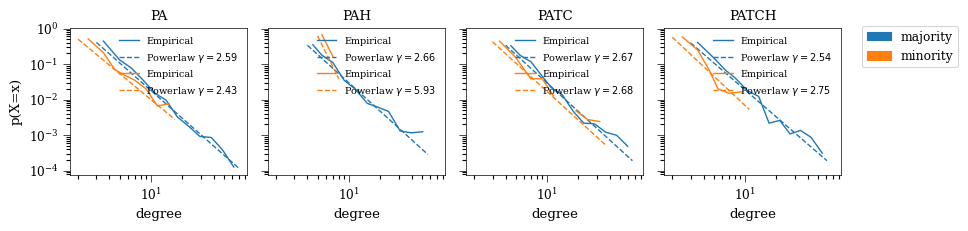

In [12]:
viz.plot_powerlaw_fit(distributions, col_name='degree', hue='class_label',
                      kind='pdf', fontsize=7,
                      cell_size=(2.15,2.4), sharex=True, sharey=True)

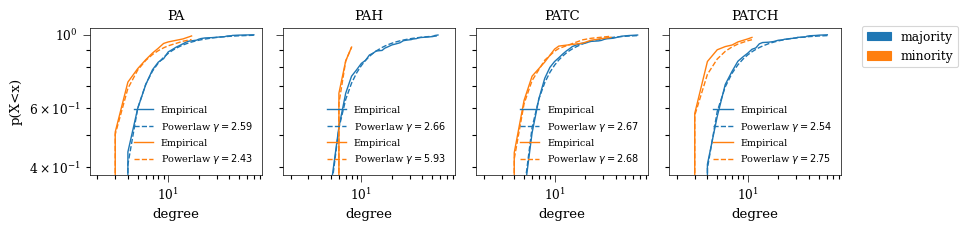

In [13]:
viz.plot_powerlaw_fit(distributions, col_name='degree', hue='class_label',
                      kind='cdf', fontsize=7,
                      cell_size=(2.15,2.4), sharex=True, sharey=True)

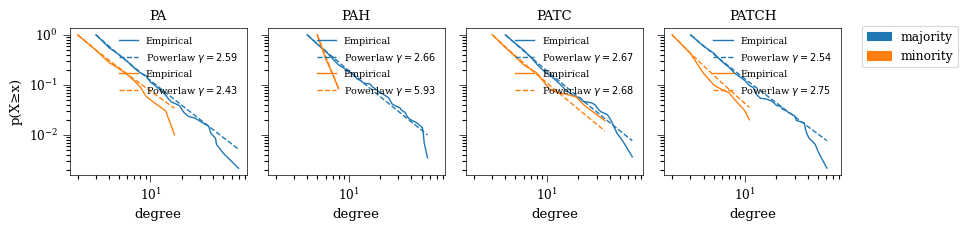

In [14]:
viz.plot_powerlaw_fit(distributions, col_name='degree', hue='class_label',
                      kind='ccdf', fontsize=7,
                      cell_size=(2.15,2.4), sharex=True, sharey=True)

#### Clustering

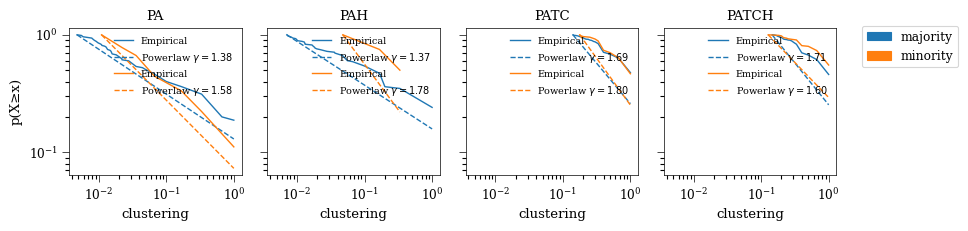

In [15]:
viz.plot_powerlaw_fit(distributions, col_name='clustering', hue='class_label',
                      kind='ccdf', fontsize=7,
                      cell_size=(2.15,2.4), sharex=True, sharey=True)

#### PageRank

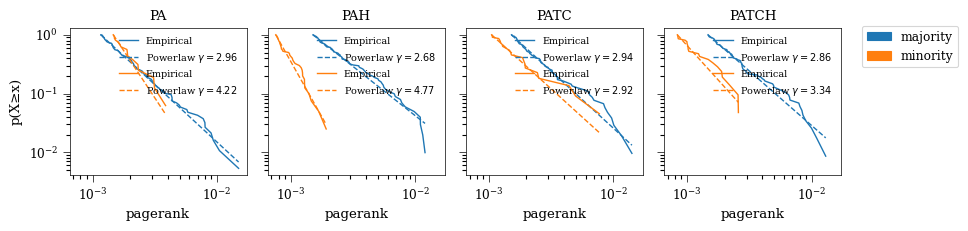

In [16]:
viz.plot_powerlaw_fit(distributions, col_name='pagerank', hue='class_label',
                      kind='ccdf', verbose=False, bbox=(1, 0.9), fontsize=7,
                      cell_size=(2.15,2.4), sharex=True, sharey=True)